<a href="https://colab.research.google.com/github/sekartalok/TFPICTURE.END/blob/main/multiclass_npz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
DATA_SAVE = '/content/drive/MyDrive/data_augmented.npz'
DATA_DIR = '/content/drive/MyDrive/archive(1)/images'

In [7]:
def create_augmentation_model():
    augmentation_model = tf.keras.Sequential([
        tf.keras.Input(shape=(200, 200, 3)),
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.2, fill_mode='reflect'),
        tf.keras.layers.RandomTranslation(0.2, 0.2, fill_mode='constant'),
        tf.keras.layers.RandomContrast(0.4),
        tf.keras.layers.RandomZoom(0.2, fill_mode='nearest')
    ])
    return augmentation_model

In [6]:

training_dataset, validation_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=DATA_DIR,
    image_size=(200, 200),
    batch_size=128,
    label_mode='categorical',
    validation_split=0.20,
    subset='both',
    seed=42
)


Found 360 files belonging to 9 classes.
Using 288 files for training.
Using 72 files for validation.


In [8]:
augmentation_model = create_augmentation_model()

In [9]:
def dataset_to_numpy(dataset, augmentation_model=None):
    images = []
    labels = []
    for img_batch, label_batch in dataset:
        # Save original images and labels
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
        # Apply augmentation
        if augmentation_model:
            img_batch = augmentation_model(img_batch)
            images.append(img_batch.numpy())  # Store augmented images
            labels.append(label_batch.numpy())  # Store the same labels
    return np.concatenate(images), np.concatenate(labels)

Train images shape: (576, 200, 200, 3)
Validation labels shape: (72, 9)


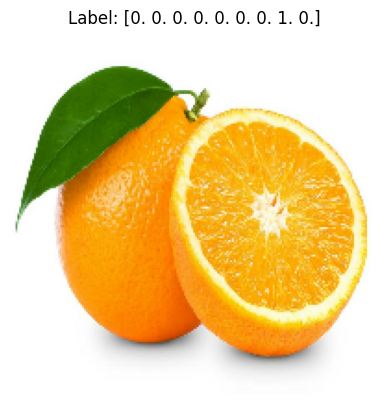

In [13]:
# Get training and validation images and labels
train_images, train_labels = dataset_to_numpy(training_dataset, augmentation_model=augmentation_model)
val_images, val_labels = dataset_to_numpy(validation_dataset)

# Save the combined images and labels
np.savez(DATA_SAVE, train_images=train_images, train_labels=train_labels,
         val_images=val_images, val_labels=val_labels)

# Load and verify the saved data
loaded_data = np.load(DATA_SAVE)
print("Train images shape:", loaded_data['train_images'].shape)
print("Validation labels shape:", loaded_data['val_labels'].shape)

# Display an example image
plt.imshow(train_images[0].astype("uint8"))
plt.title(f"Label: {train_labels[0]}")
plt.axis("off")
plt.show()

In [11]:
# Load the .npz file
data = np.load(DATA_SAVE)

In [12]:
# Access the training and validation images and labels
train_images = data['train_images']
train_labels = data['train_labels']
val_images = data['val_images']
val_labels = data['val_labels']

In [14]:
def plot_batch(images, labels, batch_size=20, title="Images"):
    total_images = len(images)
    for start in range(0, total_images, batch_size):
        end = min(start + batch_size, total_images)
        batch_images = images[start:end]
        batch_labels = labels[start:end]

        cols = 5
        rows = (batch_size // cols) + 1

        plt.figure(figsize=(15, rows * 3))
        for i in range(len(batch_images)):
            plt.subplot(rows, cols, i + 1)
            plt.imshow(batch_images[i].astype("uint8"))
            plt.title(f"Label: {batch_labels[i]}")
            plt.axis("off")
        plt.suptitle(title, fontsize=16)
        plt.show()

In [17]:
# Display all training images in batches
plot_batch(train_images, train_labels, batch_size=20, title="Training Images")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-786ab4ee17dd>", line 2, in <cell line: 2>
    plot_batch(train_images, train_labels, batch_size=20, title="Training Images")
  File "<ipython-input-14-c160286693c1>", line 18, in plot_batch
    plt.show()
  File "/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py", line 446, in show
    return _get_backend_mod().show(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/matplotlib_inline/backend_inline.py", line 90, in show
    display(
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/display.py", line 320, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/formatters.py", line 180, in format
    data = formatter(obj)
  File "<decorator-gen-2>"

TypeError: object of type 'NoneType' has no len()

In [3]:
# Display all validation images in batches
plot_batch(val_images, val_labels, batch_size=20, title="Validation Images")

NameError: name 'plot_batch' is not defined